<h2> Exploring Financial Data using Nasdaq Data Link API

`Mô tả API ngắn gọn`: API liên kết dữ liệu Nasdaq cung cấp một cổng vào nhiều tập dữ liệu tài chính, bao gồm các số liệu toàn diện về nhiều công ty khác nhau. Chúng ta sẽ tập trung vào bảng dữ liệu MER/F1, chứa thông tin tài chính chi tiết như bảng cân đối kế toán, báo cáo lưu chuyển tiền tệ và báo cáo thu nhập.

Ta sẽ trích xuất dữ liệu tài chính cho một nhóm công ty cụ thể, tập trung vào việc tìm hiểu hiệu quả tài chính của họ theo thời gian. Ta sẽ xem xét các số liệu như Doanh thu chi phí dồn tích và khám phá xem các giá trị này khác nhau như thế nào giữa các công ty và khu vực.

`Mục tiêu`: Để thực hiện phân tích chi tiết về dữ liệu tài chính này, bao gồm phân tích xu hướng và nghiên cứu so sánh. Ta sẽ sử dụng Python để truy xuất, làm sạch và phân tích dữ liệu, đồng thời tạo trực quan hóa để trình bày các phát hiện của chúng tôi một cách hiệu quả.

In [1]:
#importing necessary libraries together with the config.py file

import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import config


# configuring the api_key
api_key = config.API_KEY

In [2]:
# base url

api_url='https://data.nasdaq.com/api/v3/datatables/MER/F1.json'

# our `parameters` dictionary

parameters = {
    'api_key': api_key,
    'qopts.per_page': 10  # Number of rows to fetch

}

# Fetching the data and converting it to json

json_data = requests.get(api_url, params=parameters).json()

# printing the json data

json_data

{'datatable': {'data': [[2438,
    1868192544,
    -1802,
    10.481948,
    '2011-06-30',
    'Q2',
    'U',
    'EUR',
    'True',
    'Deutsche Bank AG',
    'Deutsche Bank AG',
    'Active',
    'DEU',
    'Europe',
    1159508,
    '5.1.1',
    'DB',
    'NYS',
    'Taunusanlage 12',
    None,
    None,
    None,
    'Frankfurt am Main',
    None,
    'DEU',
    '60325',
    '(49) 69 910 00',
    '(49) 69 910 34 225',
    'www.db.com',
    '2023-12-31',
    'Accrued Expenses Turnover',
    'Derived'],
   [2438,
    1868216112,
    -1802,
    8.161754,
    '2011-09-30',
    'Q3',
    'U',
    'EUR',
    'True',
    'Deutsche Bank AG',
    'Deutsche Bank AG',
    'Active',
    'DEU',
    'Europe',
    1159508,
    '5.1.1',
    'DB',
    'NYS',
    'Taunusanlage 12',
    None,
    None,
    None,
    'Frankfurt am Main',
    None,
    'DEU',
    '60325',
    '(49) 69 910 00',
    '(49) 69 910 34 225',
    'www.db.com',
    '2023-12-31',
    'Accrued Expenses Turnover',
    'Derived']

<h2> Processing the JSON Data into a DataFrame

In [3]:
# Example
example_data = [
    [1, 'Product A', 20.5],
    [2, 'Product B', 35.75],
    [3, 'Product C', 15.0]
]

# Corresponding column names
example_columns = ['ID', 'Name', 'Price']
example_df = pd.DataFrame(example_data, columns=example_columns)
example_df

,ID,Name,Price
0,1,Product A,20.50
1,2,Product B,35.75
2,3,Product C,15.00


In [4]:
# Update parameters
parameters["qopts.per_page"] = 10000
response = requests.get(api_url, params=parameters)
json_data=response.json()

json_cols = json_data["datatable"]["columns"]
col_names = []
for i in json_cols:
    col_names.append(i["name"])
col_names

['compnumber',
 'reportid',
 'mapcode',
 'amount',
 'reportdate',
 'reporttype',
 'auditorstatus',
 'currency',
 'consolidated',
 'longname',
 'shortname',
 'status',
 'countrycode',
 'region',
 'cik',
 'mic',
 'ticker',
 'exchange',
 'address1',
 'address2',
 'address3',
 'address4',
 'city',
 'statecode',
 'country',
 'zipcode',
 'phonenumber',
 'faxnumber',
 'website',
 'fye',
 'indicator',
 'statement']

In [26]:
df_metric = pd.DataFrame(json_data["datatable"]["data"], columns= col_names)
df_metric.head()

,compnumber,reportid,mapcode,amount,reportdate,reporttype,auditorstatus,currency,consolidated,longname,...,city,statecode,country,zipcode,phonenumber,faxnumber,website,fye,indicator,statement
0,2438,1868192544,-1802,10.481948,2011-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
1,2438,1868216112,-1802,8.161754,2011-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
2,2438,1885063456,-1802,10.788213,2012-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
3,2438,1885087024,-1802,9.437545,2012-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
4,2438,1901934112,-1802,8.755041,2013-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived


<h2> Understanding the Dataset

In [6]:
df_metric.shape

(10000, 32)

In [7]:
df_metric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   compnumber     10000 non-null  int64  
 1   reportid       10000 non-null  int64  
 2   mapcode        10000 non-null  int64  
 3   amount         10000 non-null  float64
 4   reportdate     10000 non-null  object 
 5   reporttype     10000 non-null  object 
 6   auditorstatus  9999 non-null   object 
 7   currency       10000 non-null  object 
 8   consolidated   10000 non-null  object 
 9   longname       10000 non-null  object 
 10  shortname      10000 non-null  object 
 11  status         10000 non-null  object 
 12  countrycode    10000 non-null  object 
 13  region         10000 non-null  object 
 14  cik            10000 non-null  int64  
 15  mic            10000 non-null  object 
 16  ticker         9380 non-null   object 
 17  exchange       10000 non-null  object 
 18  address

In [8]:
necessary_columns = ['reportid','reportdate','reporttype','amount','longname','country','region','indicator','statement'] 

<h2> Filtering the DataFrame for Analysis

In [9]:
filtered_df = df_metric[necessary_columns]
filtered_df = filtered_df[filtered_df["indicator"] == 'Accrued Expenses Turnover']
filtered_df["indicator"].describe()

count                           139
unique                            1
top       Accrued Expenses Turnover
freq                            139
Name: indicator, dtype: object

In [10]:
filtered_df["amount"].describe()

count    139.000000
mean      26.908762
std       33.097291
min        4.689773
25%        9.675670
50%       13.753753
75%       31.777614
max      229.810427
Name: amount, dtype: float64

In [11]:
filtered_df

,reportid,reportdate,reporttype,amount,longname,country,region,indicator,statement
0,1868192544,2011-06-30,Q2,10.481948,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived
1,1868216112,2011-09-30,Q3,8.161754,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived
2,1885063456,2012-06-30,Q2,10.788213,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived
3,1885087024,2012-09-30,Q3,9.437545,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived
4,1901934112,2013-06-30,Q2,8.755041,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived
...,...,...,...,...,...,...,...,...,...
8454,1527971840,2011-12-31,A,96.208696,Nielsen Holdings PLC,USA,Europe,Accrued Expenses Turnover,Derived
8685,1551958016,2012-12-31,A,111.933333,Nielsen Holdings PLC,USA,Europe,Accrued Expenses Turnover,Derived
8920,1575878656,2013-12-31,A,122.645161,Nielsen Holdings PLC,USA,Europe,Accrued Expenses Turnover,Derived
9153,1599799296,2014-12-31,A,147.952941,Nielsen Holdings PLC,USA,Europe,Accrued Expenses Turnover,Derived


<h2> Enhancing the DataFrame

In [12]:
filtered_df["country"].unique()

array(['DEU', 'BHS', 'GBR', 'JPN', 'CYM', 'USA', 'IRL'], dtype=object)

In [13]:
filtered_df["region"].unique()

array(['Europe', 'Latin America', 'Asia Pacific', 'North America'],
      dtype=object)

```
    'USA': 'United States of America',
    'DEU': 'Germany',
    'JPN': 'Japan',
    'CYM': 'Cayman Islands',
    'BHS': 'Bahamas`,
    'IRL': 'Ireland'

```

In [14]:
def updated_country_name(name):
    if name=='USA':
        name='United State of America'
    elif name=='JPN':
        name='Japan'
    elif name=='CYM':
        name='Cayman Islands'
    elif name=='BHS':
        name='Bahamas'
    elif name=='DEU':
        name='Germany'
    else:
        name='Ireland'
    
    return name

filtered_df_copy = filtered_df.copy()
filtered_df_copy['country_name'] = filtered_df_copy["country"].apply(updated_country_name)
filtered_df_copy.columns=['report_id','report_date','report_type',
                   'amount','company_name','country','region',
                   'indicator','statement','country_name']
updated_df = filtered_df_copy.copy()
updated_df['country_name'].value_counts()


country_name
United State of America    31
Ireland                    29
Japan                      27
Cayman Islands             27
Bahamas                    19
Germany                     6
Name: count, dtype: int64

In [15]:
updated_df

,report_id,report_date,report_type,amount,company_name,country,region,indicator,statement,country_name
0,1868192544,2011-06-30,Q2,10.481948,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived,Germany
1,1868216112,2011-09-30,Q3,8.161754,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived,Germany
2,1885063456,2012-06-30,Q2,10.788213,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived,Germany
3,1885087024,2012-09-30,Q3,9.437545,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived,Germany
4,1901934112,2013-06-30,Q2,8.755041,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived,Germany
...,...,...,...,...,...,...,...,...,...,...
8454,1527971840,2011-12-31,A,96.208696,Nielsen Holdings PLC,USA,Europe,Accrued Expenses Turnover,Derived,United State of America
8685,1551958016,2012-12-31,A,111.933333,Nielsen Holdings PLC,USA,Europe,Accrued Expenses Turnover,Derived,United State of America
8920,1575878656,2013-12-31,A,122.645161,Nielsen Holdings PLC,USA,Europe,Accrued Expenses Turnover,Derived,United State of America
9153,1599799296,2014-12-31,A,147.952941,Nielsen Holdings PLC,USA,Europe,Accrued Expenses Turnover,Derived,United State of America


<h2> Understanding financial trends over time


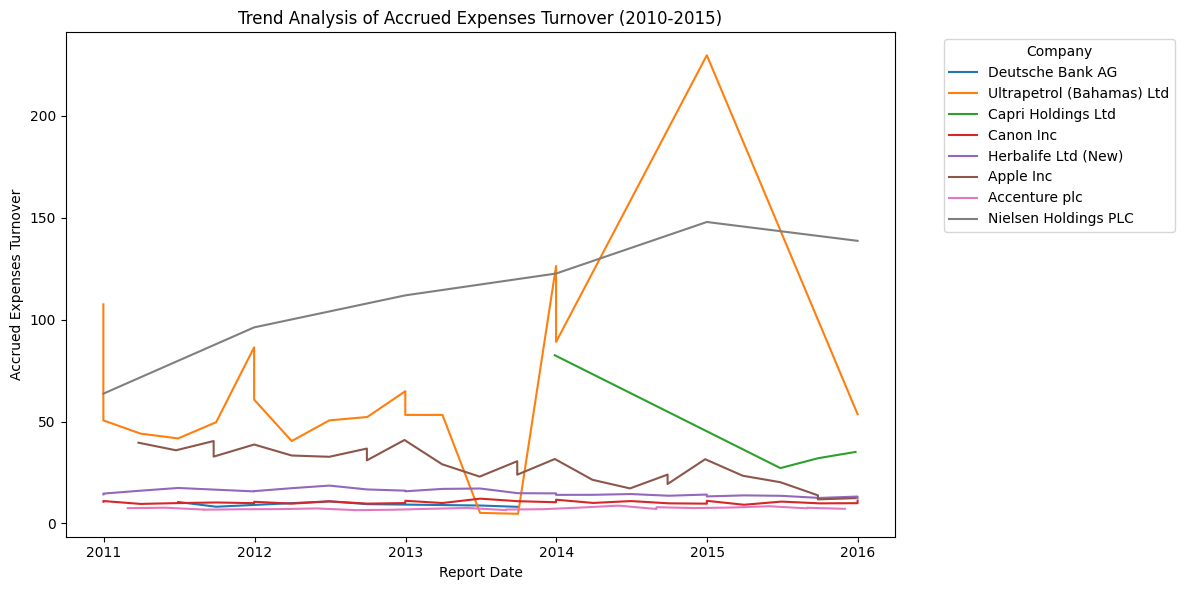

In [16]:
# Convert 'report_date' to datetime and filter for 2010-2015
updated_df['report_date'] = pd.to_datetime(updated_df['report_date'])
updated_df = updated_df[(updated_df['report_date'].dt.year >= 2010) & (updated_df['report_date'].dt.year <= 2015)]

# Selecting relevant columns. Assuming 'company_name' is the column with company names.
# Replace 'company_name', 'reportdate', and 'metric_value_column' with actual column names.
relevant_data = updated_df[['company_name', 'report_date', 'amount']].copy()

# Ploting the trend
plt.figure(figsize=(12,6))

for company in relevant_data["company_name"].unique():
    company_data = relevant_data[relevant_data['company_name'] == company]
    plt.plot(company_data['report_date'], company_data['amount'], label = company)

plt.title('Trend Analysis of Accrued Expenses Turnover (2010-2015)')
plt.xlabel('Report Date')
plt.ylabel('Accrued Expenses Turnover')
plt.legend(title = 'Company', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.tight_layout()
plt.show()

<h2> Geographical Region Analysis

In [17]:
# Grouping data by country and calculating the average of the 'amount'
country_avg = updated_df.groupby('country_name')['amount'].mean()
country_avg

country_name
Bahamas                    66.515369
Cayman Islands             15.060796
Germany                     9.288999
Ireland                    12.354379
Japan                      10.376605
United State of America    44.377585
Name: amount, dtype: float64

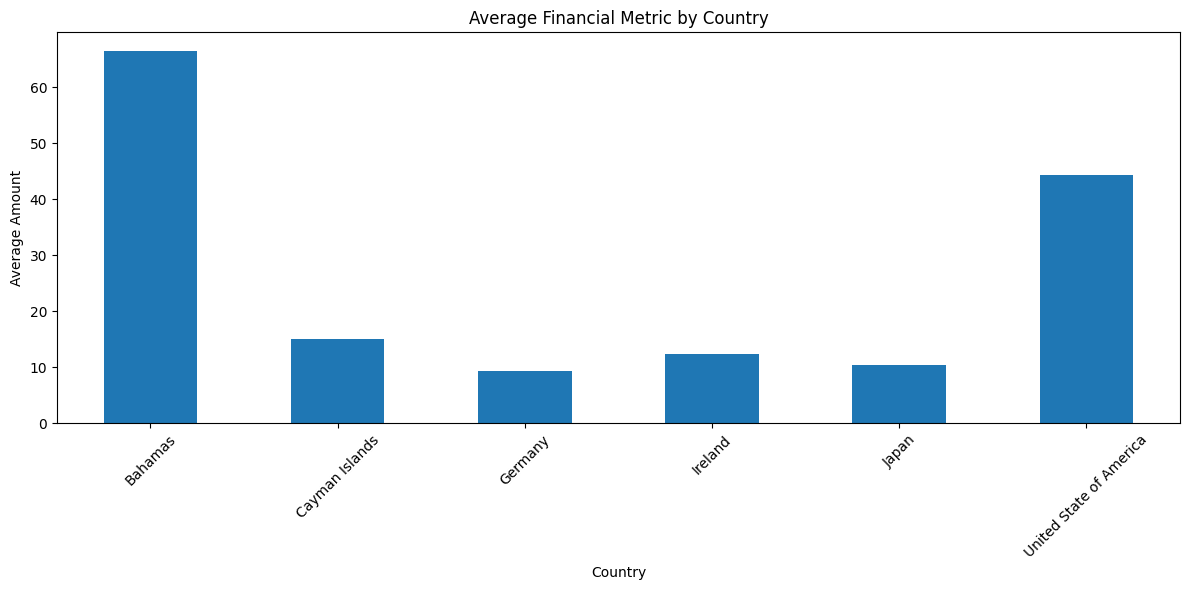

In [18]:
plt.figure(figsize=(12,6))
country_avg.plot(kind='bar')
plt.title('Average Financial Metric by Country')
plt.xlabel('Country')
plt.ylabel('Average Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()